# Load Dataset

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/dataSet.csv")

In [3]:
data.shape

(9000, 2)

In [4]:
data.head()

,Comment,Label
0,"মুভির ট্রেলার দেখে ভালোই লেগেছে, তবে কিছু কিছু...",2.0
1,"কিছু দৃশ্য খুব ভালো ছিল, কিন্তু চরিত্রগুলোর মধ...",2.0
2,"অভিনয় মোটামুটি ভালো, তবে প্রডাকশন ভীষণ ভালো হত...",2.0
3,"গল্পটা ঠিকঠাক, তবে কিছু জায়গায় লম্বা মনে হয়েছে।",2.0
4,"সুরের সাথে সাথে দৃশ্যগুলোও ভালো লেগেছে, তবে কি...",2.0


# Preparing & Splitting Data

In [5]:
data.isnull().sum()

Comment    0
Label      0
dtype: int64

In [6]:
data['Label'] = data['Label'].replace({0.0 : 'Negative', 1.0 : 'Positive', 2.0 : 'Neutral'})

In [7]:
data.head()

,Comment,Label
0,"মুভির ট্রেলার দেখে ভালোই লেগেছে, তবে কিছু কিছু...",Neutral
1,"কিছু দৃশ্য খুব ভালো ছিল, কিন্তু চরিত্রগুলোর মধ...",Neutral
2,"অভিনয় মোটামুটি ভালো, তবে প্রডাকশন ভীষণ ভালো হত...",Neutral
3,"গল্পটা ঠিকঠাক, তবে কিছু জায়গায় লম্বা মনে হয়েছে।",Neutral
4,"সুরের সাথে সাথে দৃশ্যগুলোও ভালো লেগেছে, তবে কি...",Neutral


In [8]:
X = data["Comment"]
y = data["Label"]

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_en = le.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_en, test_size=0.2, random_state=42)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vct = CountVectorizer()
X_train_vct = vct.fit_transform(X_train)
X_test_vct = vct.transform(X_test)

# Build Model

In [12]:
from sklearn.svm import SVC

model = SVC(probability=True)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.850


In [40]:
model = SVC(probability=True, C=100, gamma=0.1)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.972


# Hyperparameter Tuning

In [13]:
model = SVC(probability=True)

In [14]:
param_grid = [
    {
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    }  
]

# SVM - GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
clf = GridSearchCV(model, param_grid, refit = True, verbose = 3)

In [17]:
best_clf = clf.fit(X_train_vct,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.339 total time=   9.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.342 total time=   9.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.342 total time=   9.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.338 total time=   8.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.338 total time=   8.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.648 total time=   6.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.672 total time=   6.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.640 total time=   6.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.642 total time=   6.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.638 total time=   6.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.626 total time=   8.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [18]:
best_clf.best_estimator_

SVC(C=1, gamma=0.1, probability=True)

In [19]:
print(f'Accuracy : {best_clf.score(X_train_vct,y_train):.3f}')

Accuracy : 0.817


In [20]:
model = SVC(C=1, gamma=0.1, probability=True)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.817


# SVM - RandomizedSearchCV

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
clf = RandomizedSearchCV(model, param_grid, refit = True, verbose = 3)

In [23]:
best_clf = clf.fit(X_train_vct,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.676 total time=   6.1s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.695 total time=   6.1s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.691 total time=   6.0s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.688 total time=   6.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.678 total time=   6.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.630 total time=   8.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.645 total time=   7.9s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.615 total time=   8.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.617 total time=   7.9s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.613 total time=   7.9s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.642 total time=  10.5s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;

In [24]:
best_clf.best_estimator_

SVC(C=1000, gamma=0.0001, probability=True)

In [25]:
print(f'Accuracy : {best_clf.score(X_train_vct,y_train):.3f}')

Accuracy : 0.752


In [26]:
model = SVC(C=1000, gamma=0.0001, probability=True)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.752


# Best Result

In [46]:
model = SVC(probability=True, C=100, gamma=0.1)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.972


In [47]:
prediction = model.predict(X_test_vct)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       613
           1       0.64      0.64      0.64       614
           2       0.68      0.68      0.68       573

    accuracy                           0.63      1800
   macro avg       0.64      0.63      0.63      1800
weighted avg       0.63      0.63      0.63      1800



In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

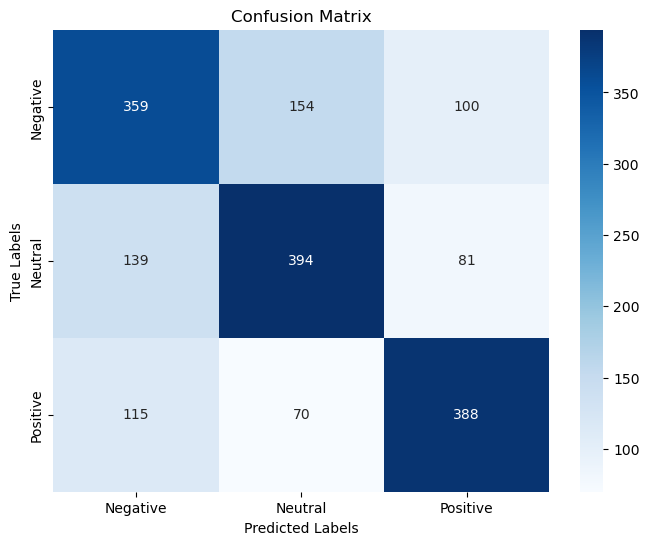

In [50]:
conf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()